# 🎵 Music Genre Classification
Using Audio Features + Machine Learning (Random Forest & CNN)

In [8]:
!pip install librosa scikit-learn matplotlib tensorflow numpy pandas

## 📁 Dataset
GTZAN-style genre classification dataset. Each genre is a folder with .wav files (~30s each).


In [1]:
import zipfile
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## 🧹 Feature Extraction
We extract MFCCs, Chroma, and Spectral Contrast features from each audio file using `librosa`.


In [3]:
# Path to your downloaded .zip file
zip_file_path = r"C:\Users\Mariam Shariff\Downloads\archive.zip"
extract_path = r"C:\Users\Mariam Shariff\Downloads\extracted_data"  # Path to where the zip file will be extracted

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")


Files extracted to: C:\Users\Mariam Shariff\Downloads\extracted_data


In [4]:
def extract_features(file_path):
    # Load the audio file using librosa
    y, sr = librosa.load(file_path, duration=30, sr=None)  # Load the audio file, 30 seconds
    
    # Extract MFCC (Mel-frequency Cepstral Coefficients)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Extract Chroma feature (used to analyze harmony)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Extract Spectral Contrast (useful for genre classification)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    # Combine features into a single feature vector by averaging each feature
    features = np.hstack([np.mean(mfcc, axis=1), np.mean(chroma, axis=1), np.mean(spectral_contrast, axis=1)])
    
    return features


In [5]:
# Path to the audio data folder
audio_data_dir = r'C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data'

# Initialize lists to store features and labels
X = []  # Features
y = []  # Labels (genres)

# Loop through the directories (each genre is a folder)
for genre in os.listdir(audio_data_dir):
    genre_path = os.path.join(audio_data_dir, genre)
    if os.path.isdir(genre_path):  # Check if it's a genre folder
        print(f"Processing genre folder: {genre}")
        for file in os.listdir(genre_path):
            if file.endswith('.wav'):  # Only process .wav files
                file_path = os.path.join(genre_path, file)
                print(f"Processing file: {file_path}")  # Debugging line
                features = extract_features(file_path)  # Extract features from audio
                X.append(features)  # Append the features to X
                y.append(genre)  # Append the genre label to y

# Convert the features and labels to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Processing genre folder: blues
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00000.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00001.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00002.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00003.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00004.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00005.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00006.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00007.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\blues\blues.00008.wav
Processing file: C:\Users\Mariam Shariff\Downloads\extracted_data\audio_data\b

In [6]:
# Encode the genre labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## 🌲 Model 1: Random Forest Classifier
Simple tree-based model trained on extracted features.


In [8]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (800, 32)
Test set shape: (200, 32)


## 🧠 Model 2: Convolutional Neural Network (CNN)
A deep learning approach applied on reshaped features.


In [10]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the genre on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Confusion matrix for further evaluation
print(confusion_matrix(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.61
[[12  0  0  2  0  3  1  0  1  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  1 17  2  0  0  0  1  1  3]
 [ 2  0  0 14  3  0  0  2  0  0]
 [ 0  0  0  2  9  0  1  2  1  0]
 [ 1  2  3  1  0 14  0  0  1  0]
 [ 0  0  0  0  3  0 22  0  0  0]
 [ 0  0  1  0  1  3  0  6  2  0]
 [ 2  0  3  3  1  1  0  3 10  0]
 [ 3  0  2  4  3  1  0  1  2  5]]
              precision    recall  f1-score   support

       blues       0.55      0.60      0.57        20
   classical       0.81      1.00      0.90        13
     country       0.65      0.63      0.64        27
       disco       0.50      0.67      0.57        21
      hiphop       0.45      0.60      0.51        15
        jazz       0.64      0.64      0.64        22
       metal       0.92      0.88      0.90        25
         pop       0.40      0.46      0.43        13
      reggae       0.56      0.43      0.49        23
        rock       0.56      0.24      0.33        21

    accuracy                           0.61 

In [11]:
# Reshape the data into 4D format for CNN (samples, height, width, channels)
# Assuming X_train and X_test are 2D arrays, we need to reshape them to 4D

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)  # 4D shape: (samples, features, 1, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)  # 4D shape: (samples, features, 1, 1)


## 📊 Model Evaluation
We evaluate using accuracy and a confusion matrix.


In [14]:
model = Sequential()

# Adjust the input shape and Conv2D layer with smaller kernel size
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], 1, 1)))

# Use smaller pool size (1x1) to avoid negative dimension error
model.add(MaxPooling2D(pool_size=(1, 1)))

# Flatten the output from the Conv2D layer
model.add(Flatten())

# Add a dense layer
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation (since this is a multi-class classification problem)
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/10


C:\Users\Mariam Shariff\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1991 - loss: 6.2720 - val_accuracy: 0.3050 - val_loss: 2.5222
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4015 - loss: 1.9658 - val_accuracy: 0.3950 - val_loss: 1.7072
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4402 - loss: 1.4558 - val_accuracy: 0.4300 - val_loss: 1.5724
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5286 - loss: 1.2680 - val_accuracy: 0.3950 - val_loss: 1.7294
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5527 - loss: 1.2021 - val_accuracy: 0.4250 - val_loss: 1.6910
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5405 - loss: 1.2567 - val_accuracy: 0.5000 - val_loss: 1.5018
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5597 - loss: 1.1973 - val_accuracy: 0.4250 - val_loss: 1.8363
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5420 - loss: 1.2564 - val_accuracy: 0.5400 - val_loss: 1.4878
Ep

## 📈 CNN Training Accuracy & Loss Curves
Let's visualize model learning over epochs.


In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f"CNN Model Test Accuracy: {test_acc:.2f}")

# Confusion Matrix for Deep Learning Model
y_pred_dl = model.predict(X_test_reshaped)
y_pred_dl = np.argmax(y_pred_dl, axis=1)  # Convert predicted probabilities to class labels

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_dl))
print(classification_report(y_test, y_pred_dl, target_names=label_encoder.classes_))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5412 - loss: 1.3839 
CNN Model Test Accuracy: 0.53
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[11  0  0  0  1  2  4  0  0  2]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 5  0 18  0  1  0  0  1  0  2]
 [ 1  1  1  6  7  0  1  1  2  1]
 [ 1  0  0  0  3  0  3  2  5  1]
 [ 1  3  6  1  0  8  0  0  1  2]
 [ 0  0  0  0  1  0 23  0  0  1]
 [ 1  0  0  1  1  0  0  9  1  0]
 [ 2  0  4  1  3  2  2  0  9  0]
 [ 2  0  7  0  3  1  1  1  0  6]]
              precision    recall  f1-score   support

       blues       0.46      0.55      0.50        20
   classical       0.76      1.00      0.87        13
     country       0.50      0.67      0.57        27
       disco       0.67      0.29      0.40        21
      hiphop       0.15      0.20      0.17        15
        jazz       0.62      0.36      0.46        22
       metal       0.68      0.92      0.78        25
         pop       0.64      0.69      0.67        13
      reggae       0.50      0.39      0.4

## 📋 Model Comparison
Comparison of accuracy between Random Forest and CNN.

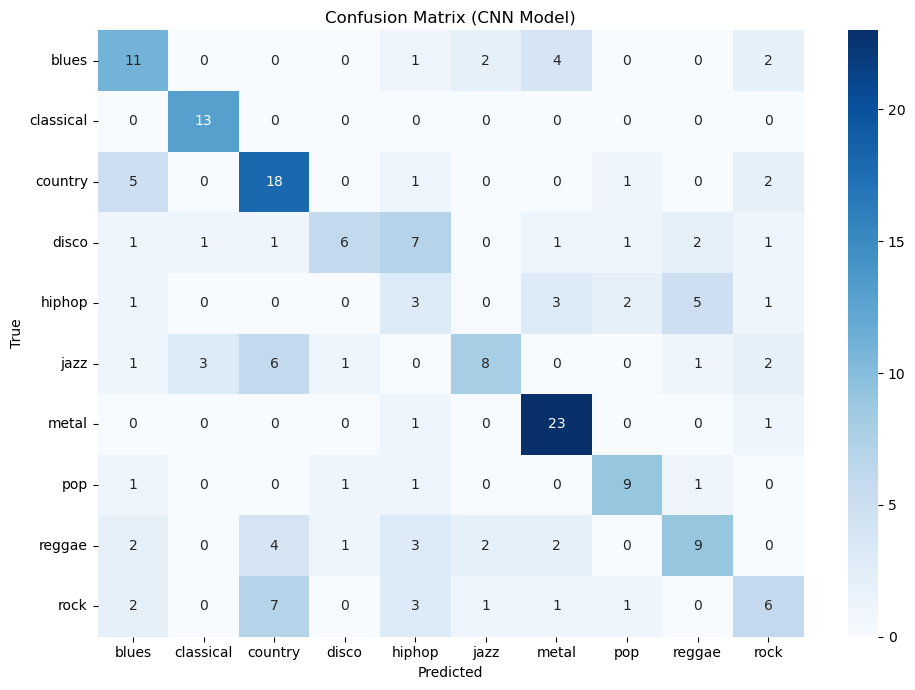

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred_dl already exist from your model
conf_mat = confusion_matrix(y_test, y_pred_dl)

# Plot and save confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN Model)')
plt.tight_layout()


plt.savefig("confusion_matrix.png")  
plt.show()
